In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns


In [5]:
df = pd.read_csv('DR_Simulation.csv', skiprows=5, index_col=False)
print(df)

           Date      Time System Setting        System Mode Calendar Event  \
0    2023-06-19  00:00:00           cool  compressorCoolOff            NaN   
1    2023-06-19  00:05:00           cool  compressorCoolOff            NaN   
2    2023-06-19  00:10:00           cool  compressorCoolOff            NaN   
3    2023-06-19  00:15:00           cool  compressorCoolOff            NaN   
4    2023-06-19  00:20:00           cool  compressorCoolOff            NaN   
..          ...       ...            ...                ...            ...   
283  2023-06-19  23:35:00           cool  compressorCoolOff            NaN   
284  2023-06-19  23:40:00           cool  compressorCoolOff            NaN   
285  2023-06-19  23:45:00           cool  compressorCoolOff            NaN   
286  2023-06-19  23:50:00           cool  compressorCoolOff            NaN   
287  2023-06-19  23:55:00           cool  compressorCoolOff            NaN   

    Program Mode  Cool Set Temp (F)  Heat Set Temp (F)  Current

/var/folders/q5/xbcszlgx0s78ry5h1wzcd5qc0000gn/T/ipykernel_2168/1552338792.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot_date(df['DateTime'], df[room], linestyle='solid', marker=None, label=room)
/var/folders/q5/xbcszlgx0s78ry5h1wzcd5qc0000gn/T/ipykernel_2168/1552338792.py:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot_date(df['DateTime'], df['Outdoor Temp (F)'], linestyle='solid', marker=None, color='red', label='Outdoor Temp (F)')


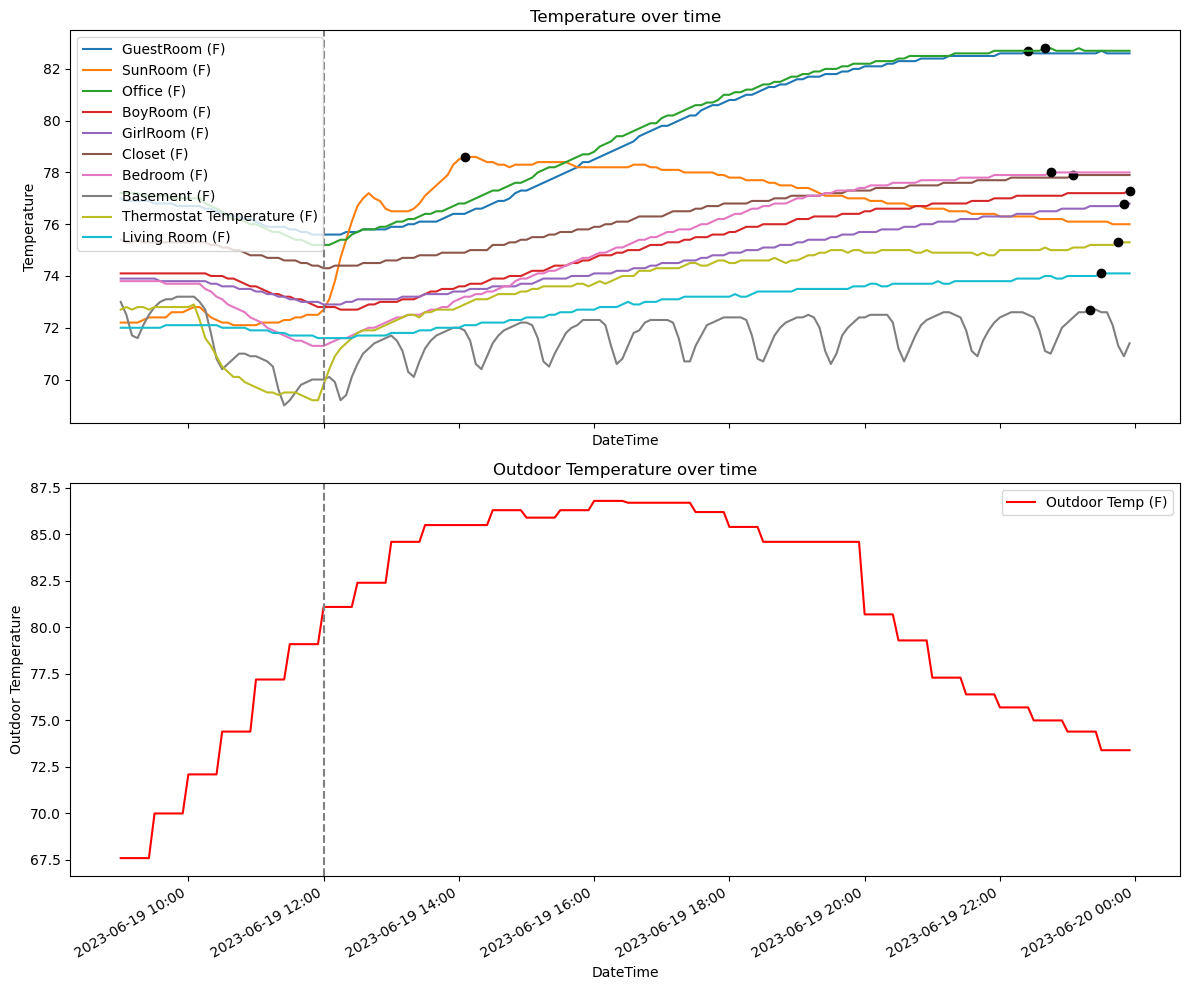

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

# Select the columns that you care about
columns_to_consider = ['Date', 'Time', 'Office (F)','GuestRoom (F)','SunRoom (F)','BoyRoom (F)', 'GirlRoom (F)', 'Closet (F)', 'Bedroom (F)', 'Basement (F)', 'Thermostat Temperature (F)', 'Living Room (F)', 'Outdoor Temp (F)']

# Drop rows where any of these columns are NaN
df = df.dropna(subset=columns_to_consider)

# Combine 'Date' and 'Time' columns into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Filter rows between 9 AM to the rest
df = df[df['DateTime'].dt.hour >= 9]

# Specify the columns (rooms) to plot
room_columns = ['GuestRoom (F)','SunRoom (F)','Office (F)','BoyRoom (F)', 'GirlRoom (F)', 'Closet (F)', 'Bedroom (F)', 'Basement (F)', 'Thermostat Temperature (F)', 'Living Room (F)']

# Create a figure with 2 subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(12,10))  # Change figsize as necessary

# First subplot
for room in room_columns:
    room_data = df[df['DateTime'].dt.hour >= 12][room]
    max_value = room_data.max()
    max_time = room_data[room_data == max_value].index[0]
    axs[0].plot_date(df['DateTime'], df[room], linestyle='solid', marker=None, label=room)
    axs[0].plot_date(df.loc[max_time, 'DateTime'], max_value, 'ko')  # Adds a black marker for max value

# Format datetime on the x-axis
fig.autofmt_xdate()  # rotation of the x-axis values

# You can customize the date format here. '%Y-%m-%d %H:%M' means "Year-Month-Day Hour:Minute".
date_format = mpl_dates.DateFormatter('%Y-%m-%d %H:%M')
axs[0].xaxis.set_major_formatter(date_format)  # format x-axis display

axs[0].set_title('Temperature over time')
axs[0].set_xlabel('DateTime')
axs[0].set_ylabel('Temperature')
axs[0].legend()  # display the legend

# Add a vertical line at 12 PM
noon = df['DateTime'].apply(lambda dt: dt.replace(hour=12, minute=0, second=0))
axs[0].axvline(noon.iloc[0], color='gray', linestyle='--')  # Change color and linestyle as necessary

# Second subplot for 'Outdoor Temp (F)'
axs[1].plot_date(df['DateTime'], df['Outdoor Temp (F)'], linestyle='solid', marker=None, color='red', label='Outdoor Temp (F)')
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_title('Outdoor Temperature over time')
axs[1].set_xlabel('DateTime')
axs[1].set_ylabel('Outdoor Temperature')
axs[1].legend()

# Add a vertical line at 12 PM
axs[1].axvline(noon.iloc[0], color='gray', linestyle='--')  # Change color and linestyle as necessary

plt.tight_layout()
plt.show()


In [7]:
# Add a 'Hour' column to make filtering easier
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
# Get the row corresponding to noon (12 PM)
noon_row = df[df['Hour'] == 12]

for room in room_columns:
    # Filter data for times after 12 PM
    room_data_after_noon = df[df['Hour'] >= 12][room]
    
    # Find the maximum value
    max_value = room_data_after_noon.max()
    
    # Find the value at noon
    noon_value = noon_row[room].iloc[0]
    
    # Calculate the difference
    difference = max_value - noon_value
    
    print(f"For {room}, the difference between the maximum value and the temperature at noon is {round(difference,4)}")


For GuestRoom (F), the difference between the maximum value and the temperature at noon is 7.1
For SunRoom (F), the difference between the maximum value and the temperature at noon is 5.9
For Office (F), the difference between the maximum value and the temperature at noon is 7.6
For BoyRoom (F), the difference between the maximum value and the temperature at noon is 4.5
For GirlRoom (F), the difference between the maximum value and the temperature at noon is 3.9
For Closet (F), the difference between the maximum value and the temperature at noon is 3.6
For Bedroom (F), the difference between the maximum value and the temperature at noon is 6.7
For Basement (F), the difference between the maximum value and the temperature at noon is 2.7
For Thermostat Temperature (F), the difference between the maximum value and the temperature at noon is 5.5
For Living Room (F), the difference between the maximum value and the temperature at noon is 2.5


/var/folders/q5/xbcszlgx0s78ry5h1wzcd5qc0000gn/T/ipykernel_2168/229765876.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(df['DateTime'], df[room + '_diff'], linestyle='solid', marker=None, label=room)
/var/folders/q5/xbcszlgx0s78ry5h1wzcd5qc0000gn/T/ipykernel_2168/229765876.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(df['DateTime'], df[room + '_diff'], linestyle='solid', marker=None, label=room)
/var/folders/q5/xbcszlgx0s78ry5h1wzcd5qc0000gn/T/ipykernel_2168/229765876.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(df['DateTime'], df[room + '_diff'], linestyle='solid', marker=None, label=room

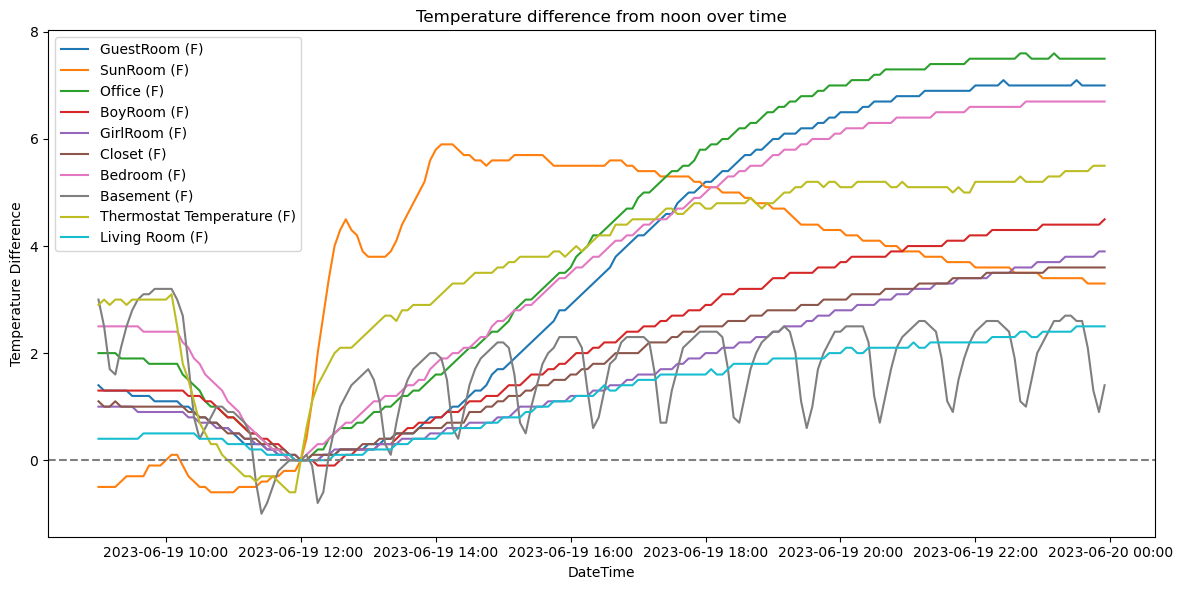

In [8]:
fig, ax = plt.subplots(figsize=(12, 6)) 

for room in room_columns:
    # For each room, calculate the difference from the exact noon temperature
    noon_temperature = df[(df['Hour'] == 12) & (df['Minute'] == 0)][room].values[0]
    df[room + '_diff'] = df[room] - noon_temperature

    # Plot the differences
    ax.plot_date(df['DateTime'], df[room + '_diff'], linestyle='solid', marker=None, label=room)

# Format datetime on the x-axis
ax.xaxis.set_major_formatter(date_format)
    
ax.set_title('Temperature difference from noon over time')
ax.set_xlabel('DateTime')
ax.set_ylabel('Temperature Difference')
ax.legend()

# Add a horizontal line at zero
ax.axhline(0, color='gray', linestyle='--') 

plt.tight_layout()
plt.show()




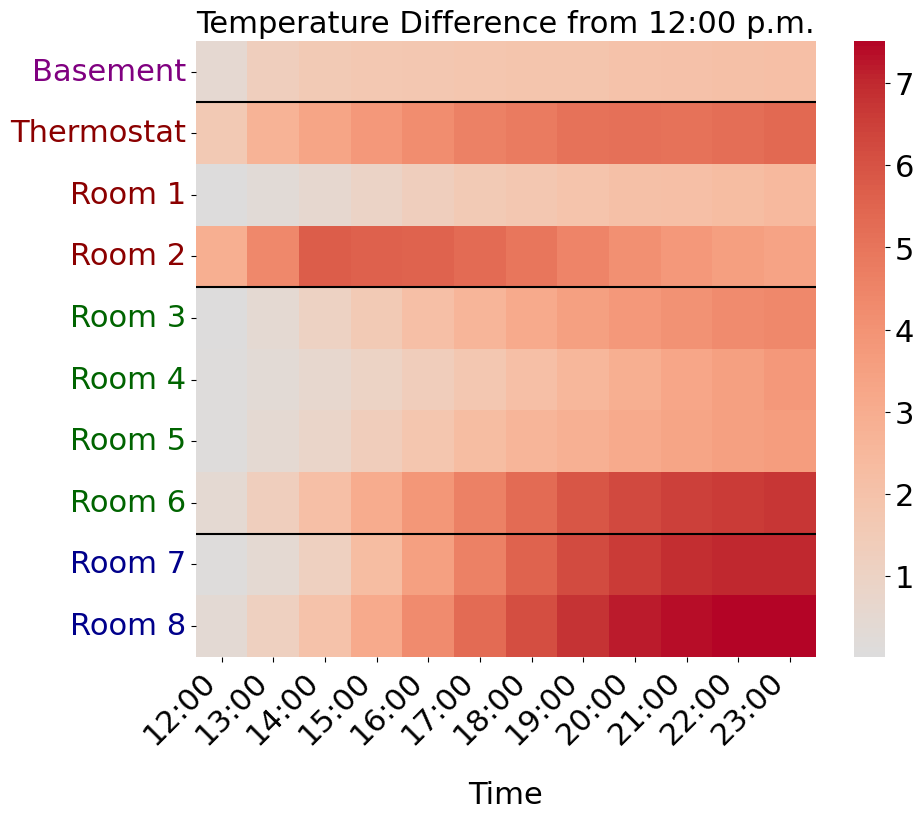

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

room_columns = ['Thermostat Temperature (F)','Living Room (F)', 'SunRoom (F)', 'Office (F)', 'GuestRoom (F)', 'BoyRoom (F)', 'GirlRoom (F)', 'Closet (F)', 'Bedroom (F)', 'Basement (F)']

room_name_map = {
    'Thermostat Temperature (F)':'Thermostat',
    'Living Room (F)': 'Room 1',
    'SunRoom (F)': 'Room 2',
    'BoyRoom (F)': 'Room 3',
    'GirlRoom (F)': 'Room 4',
    'Closet (F)': 'Room 5',
    'Bedroom (F)': 'Room 6',
    'GuestRoom (F)': 'Room 7',
    'Office (F)': 'Room 8',
    'Basement (F)': 'Basement'
}

# Reorder the room_name_map to have 'Basement' first
room_name_map = {k: room_name_map[k] for k in ['Basement (F)'] + [key for key in room_name_map if key != 'Basement (F)']}

for room in room_columns:
    noon_temperature = df[(df.index.hour == 12) & (df.index.minute == 0)][room].values[0]
    df[room_name_map[room] + '_diff'] = df[room] - noon_temperature

diff_columns = [room_name_map[room] + '_diff' for room in room_columns]
df_hourly_diff = df[diff_columns].resample('H').mean()

df_hourly_diff.rename(columns={col: col.replace('_diff', '') for col in diff_columns}, inplace=True)

df_after_noon_diff = df_hourly_diff[df_hourly_diff.index.hour >= 12]

# Here we sort the columns according to the order they appear in the map
sorted_column_names = sorted(df_after_noon_diff.columns, key=lambda x: list(room_name_map.values()).index(x))
df_after_noon_diff = df_after_noon_diff[sorted_column_names]

heatmap_data_diff = df_after_noon_diff.T

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data_diff, cmap='coolwarm', center=0)

# Add horizontal lines to separate rooms from different floors
plt.axhline(y=1, color='black', linestyle='-')
plt.axhline(y=4, color='black', linestyle='-')
plt.axhline(y=8, color='black', linestyle='-')

plt.title('Temperature Difference from 12:00 p.m.', fontsize=22)

x_times = df_after_noon_diff.index.strftime('%H:%M').sort_values().unique()
ax.set_xticklabels(labels=x_times, rotation=45, ha='right', fontsize=22)
ax.set_xlabel('Time', fontsize=22, labelpad=22)  # Increase x-axis label size

# Get the y-axis labels and color them based on the floor
y_labels = ax.get_yticklabels()
floor_colors = ['purple', 'darkred', 'darkred', 'darkred', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkblue', 'darkblue']
for i, label in enumerate(y_labels):
    label.set_color(floor_colors[i])

ax.set_yticklabels(labels=y_labels)  # Apply the color changes to the y-axis labels
ax.tick_params(axis='y', labelsize=22)  # Increase y-axis label size

# Increase colorbar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
plt.savefig('heatmap.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


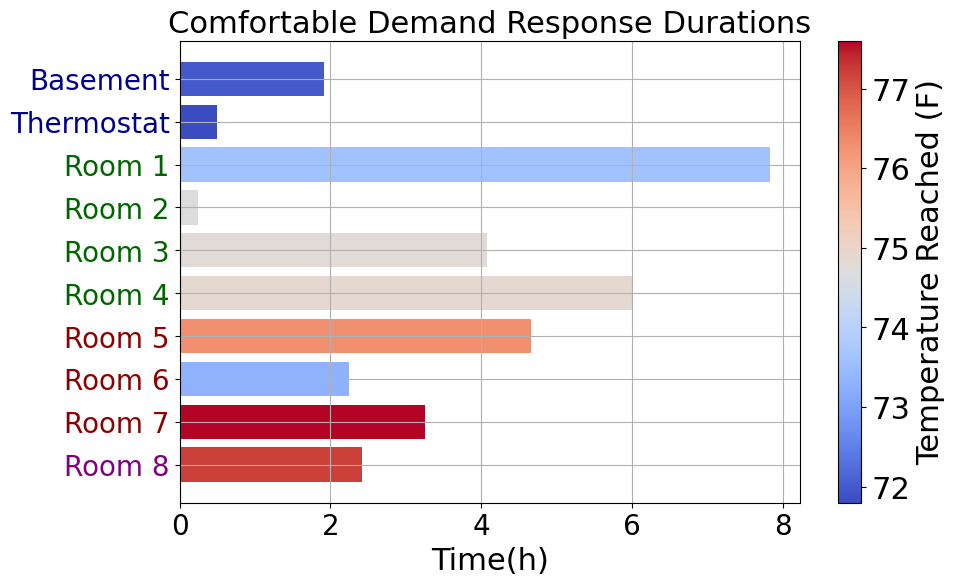

In [22]:
import matplotlib.cm as cm

# Calculate noon temperature for each room and find the time where the temperature has increased by 2F
time_to_increase_2F = {}
temperature_reached = {}
start_end_times = {}

for room in room_columns:
    noon_temperature = df[(df.index.hour == 12) & (df.index.minute == 0)][room].values[0]
    df_after_noon = df[df.index.hour >= 12].copy()
    df_after_noon[room_name_map[room] + '_diff'] = df_after_noon[room] - noon_temperature
    df_after_noon_2F = df_after_noon[df_after_noon[room_name_map[room] + '_diff'] >= 2]

    if not df_after_noon_2F.empty:
        first_time_reached = df_after_noon_2F.index[0]
        time_diff = (first_time_reached - df_after_noon.index[0]).total_seconds() / 60  # convert to minutes
        time_to_increase_2F[room_name_map[room]] = time_diff / 60 # convert to hours for plotting
        start_end_times[room_name_map[room]] = (df_after_noon.index[0], first_time_reached)
        temperature_reached[room_name_map[room]] = df_after_noon_2F[room].iloc[0]
    else:
        time_to_increase_2F[room_name_map[room]] = np.nan  # if the temperature never reached 2F above noon temperature
        temperature_reached[room_name_map[room]] = np.nan
        start_end_times[room_name_map[room]] = (np.nan, np.nan)

# Calculate average outdoor temperature during the longest period
longest_room = max(start_end_times.keys(), key=(lambda key: start_end_times[key][1] - start_end_times[key][0]))
start_time, end_time = start_end_times[longest_room]
avg_outdoor_temp = df.loc[start_time:end_time, 'Outdoor Temp (F)'].mean()

# Use matplotlib.colormaps to access the colormap in a way that avoids deprecation warnings
cmap = plt.colormaps.get_cmap('coolwarm')

# Reverse the room_name_map dictionary for sorting
reverse_map = {v: k for k, v in room_name_map.items()}

# Sort the rooms and corresponding values according to the order in room_name_map
sorted_rooms = sorted(time_to_increase_2F.keys(), key=lambda room: list(reverse_map.keys()).index(room), reverse=True)
sorted_time_differences = [time_to_increase_2F[room] for room in sorted_rooms]
sorted_temperatures = [temperature_reached[room] for room in sorted_rooms]

# Normalize the temperatures for the colormap
norm = mcolors.Normalize(min(sorted_temperatures), max(sorted_temperatures))

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax.barh(sorted_rooms, sorted_time_differences, color=cmap(norm(sorted_temperatures)))

# Customize the plot
ax.set_xlabel('Time(h)', fontsize=22)
ax.set_title('Comfortable Demand Response Durations', fontsize=22)

# Get the y-axis labels and color them based on the floor (ensure you have the labels)
# NOTE: This part might need adjustment based on your actual data and labels
floor_colors = ['purple', 'darkred', 'darkred', 'darkred', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkblue', 'darkblue']
y_labels = ax.get_yticklabels()
for i, label in enumerate(y_labels[:len(floor_colors)]):  # Adjusted to avoid index out of range
    label.set_color(floor_colors[i])

# Create and customize the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Temperature Reached (F)', size=22)
cbar.ax.tick_params(labelsize=22)

# Set tick sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.grid(True)

# Save the figure
fig.savefig('durations.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Uncomment the following line if you want to display the average outdoor temperature as text on the plot
# ax.text(0.65, 0.98, 'Avg Outdoor Temp: {:.0f} F'.format(avg_outdoor_temp), transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.show()

